# Comparison of Different Algorithms in Predicting Bike Sharing Hourly Count
##### ML2 Lab 1

In [1]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# tf.enable_eager_execution()
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('hour.csv')

## EDA

In [3]:
df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [4]:
df.shape

(17379, 17)

In [5]:
df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [6]:
df.profile_report(style={'full_width':True})

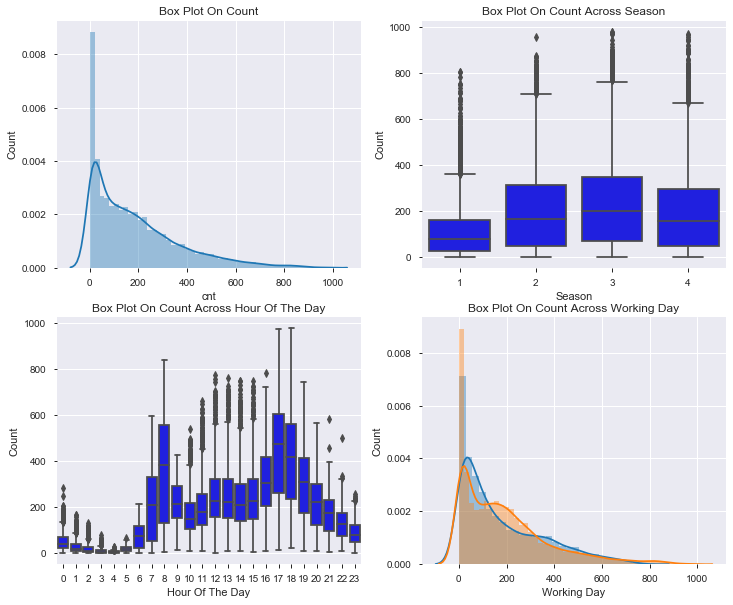

In [7]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)

sns.distplot(df["cnt"], ax=axes[0][0])
sns.boxplot(data=df,y="cnt",x="season",orient="v",ax=axes[0][1], color='b')
sns.boxplot(data=df,y="cnt",x="hr",orient="v",ax=axes[1][0], color='b')
sns.distplot(df[df['workingday']==0]["cnt"], ax=axes[1][1])
sns.distplot(df[df['workingday']==1]["cnt"], ax=axes[1][1])
# sns.boxplot(data=df,y="cnt",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day");

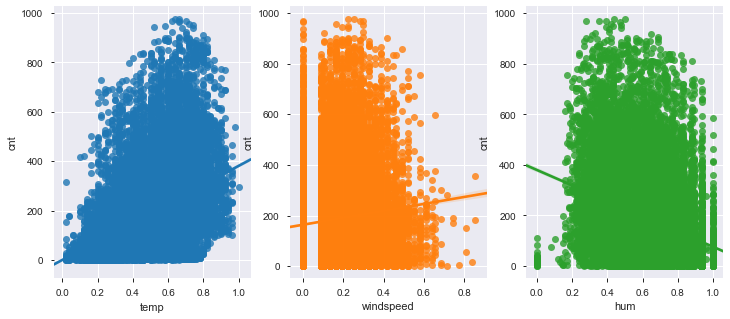

In [12]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="cnt", data=df,ax=ax1)
sns.regplot(x="windspeed", y="cnt", data=df,ax=ax2)
sns.regplot(x="hum", y="cnt", data=df,ax=ax3)

In [13]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'cnt-1', 'cnt-2', 'cnt-3', 'cnt-4',
       'cnt-5', 'cnt-6', 'cnt-7', 'cnt-8'],
      dtype='object')

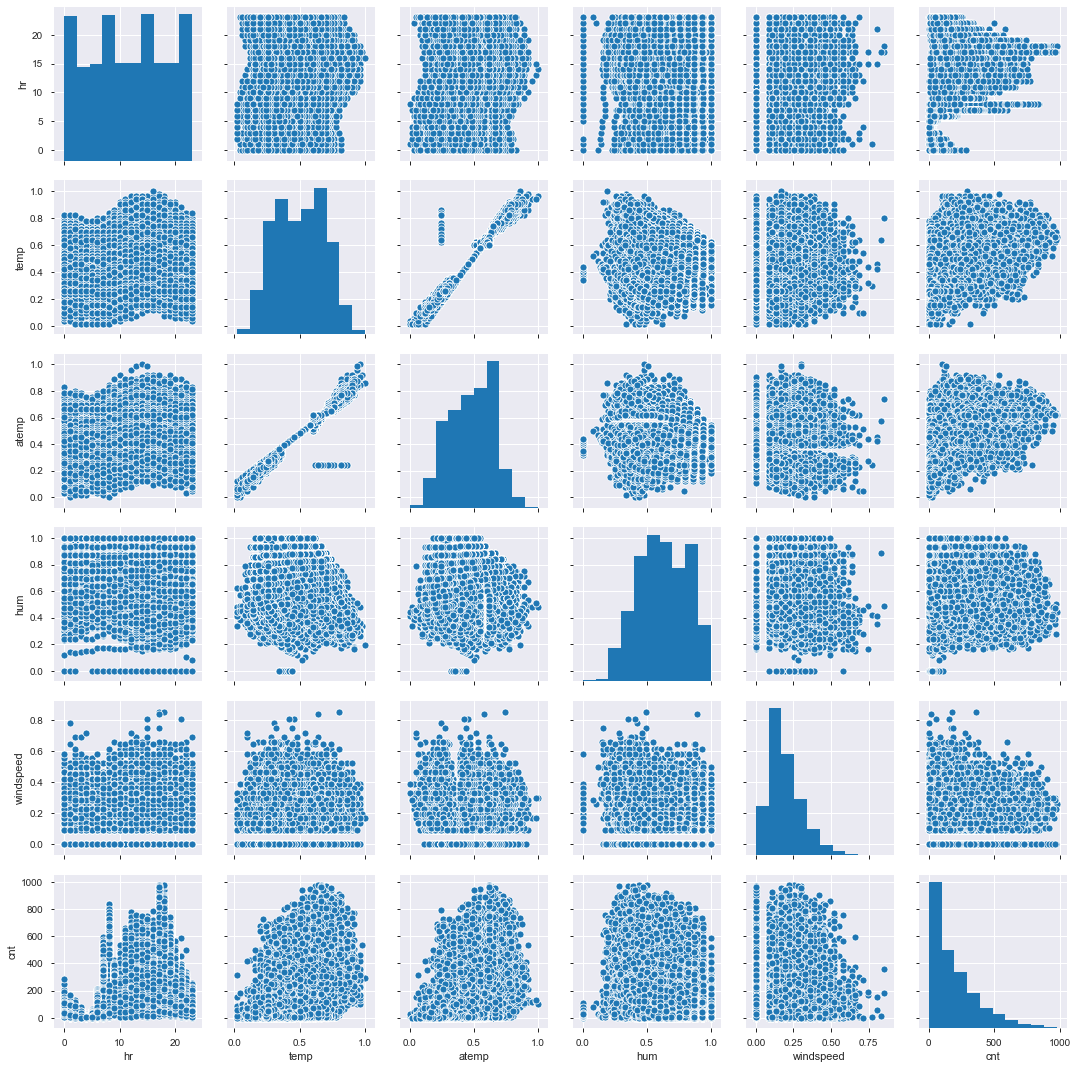

In [14]:
sns.pairplot(df[['hr','temp', 'atemp', 'hum', 'windspeed', 'cnt']])

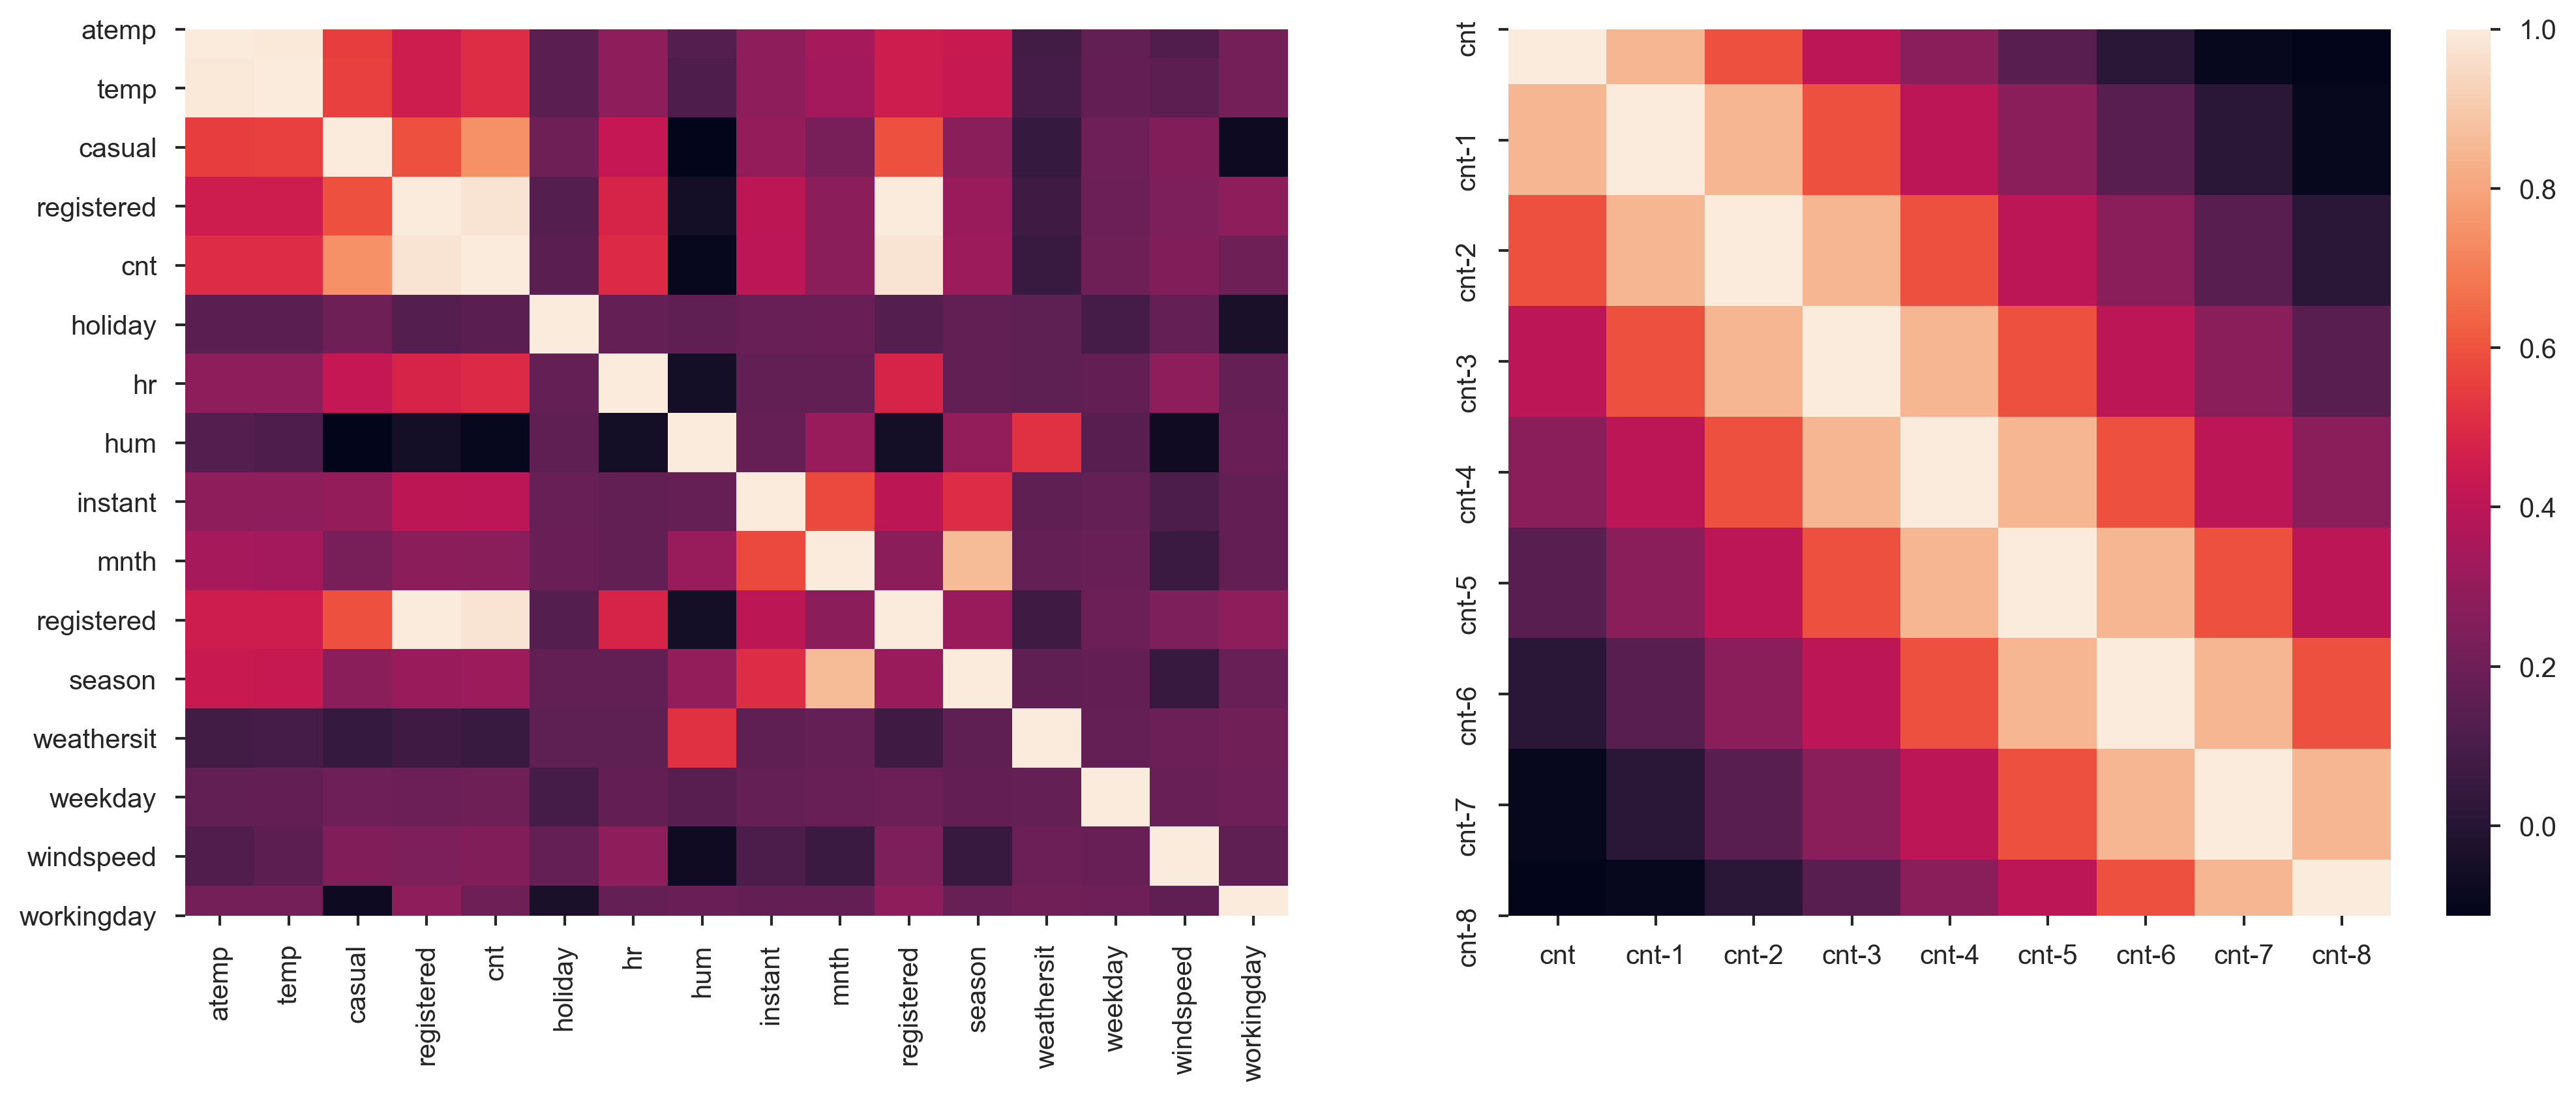

In [11]:
# sns.pairplot()
fig, ax = plt.subplots(1,2, figsize=(16,6), dpi=300)
sns.heatmap(df[['atemp', 'temp', 'casual', 'registered', 'cnt', 'holiday', 'hr', 
               'hum', 'instant', 'mnth', 'registered', 'season', 'weathersit',
               'weekday', 'windspeed', 'workingday']].corr(), ax=ax[0], cbar=False)
sns.heatmap(df.filter(regex="cnt").corr(), ax=ax[1])

In [3]:
df.drop(['instant', 'casual', 'registered', 'dteday', 'temp'], axis=1, inplace=True)

1. shift time elements from season to workingday shift(-1) shift(+1)...(shift+9)
2. shift other elements shift(+1)...(shift+9)
3. get_dummies similar features before (also the shifted)
3. predict cnt_target (shift (-1))

In [4]:
col_orig = df.columns

In [5]:
df.columns = [i+'_0' for i in df.columns]

In [6]:
df['cnt_target'] = df['cnt_0'].shift(-1)
df.head()

season_0  yr_0  mnth_0  hr_0  holiday_0  weekday_0  workingday_0  \
0         1     0       1     0          0          6             0   
1         1     0       1     1          0          6             0   
2         1     0       1     2          0          6             0   
3         1     0       1     3          0          6             0   
4         1     0       1     4          0          6             0   

   weathersit_0  atemp_0  hum_0  windspeed_0  cnt_0  cnt_target  
0             1   0.2879   0.81          0.0     16        40.0  
1             1   0.2727   0.80          0.0     40        32.0  
2             1   0.2727   0.80          0.0     32        13.0  
3             1   0.2879   0.75          0.0     13         1.0  
4             1   0.2879   0.75          0.0      1         1.0

In [7]:
col_time = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday']

In [8]:
weather_map = {1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
               2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
               3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
               4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"}
df['weathersit_0'] = df['weathersit_0'].map(weather_map)

In [9]:
season_map = {1:"winter", 2:"spring", 3:"summer", 4:"fall"}
df['season_0'] = df['season_0'].map(season_map)

In [10]:
df = df.drop(df.filter(regex='hr_[^1]').columns, axis=1)

In [11]:
col_orig = list(col_orig)
col_orig.remove('hr')

In [12]:
for col in col_orig:
    for lag in range(1, 25):
        df[f'{col}_-{lag}'] = df[f'{col}_0'].shift(lag)
    if col in col_time:
        df[f'{col}_1'] = df[f'{col}_0'].shift(-1)
df.head()

season_0  yr_0  mnth_0  holiday_0  weekday_0  workingday_0  \
0   winter     0       1          0          6             0   
1   winter     0       1          0          6             0   
2   winter     0       1          0          6             0   
3   winter     0       1          0          6             0   
4   winter     0       1          0          6             0   

                                      weathersit_0  atemp_0  hum_0  \
0  Clear, Few clouds, Partly cloudy, Partly cloudy   0.2879   0.81   
1  Clear, Few clouds, Partly cloudy, Partly cloudy   0.2727   0.80   
2  Clear, Few clouds, Partly cloudy, Partly cloudy   0.2727   0.80   
3  Clear, Few clouds, Partly cloudy, Partly cloudy   0.2879   0.75   
4  Clear, Few clouds, Partly cloudy, Partly cloudy   0.2879   0.75   

   windspeed_0  ...  cnt_-15  cnt_-16 cnt_-17 cnt_-18 cnt_-19 cnt_-20 cnt_-21  \
0          0.0  ...      NaN      NaN     NaN     NaN     NaN     NaN     NaN   
1          0.0  ...      NaN      NaN     NaN     NaN     NaN     NaN     NaN   
2          0.0  ...      NaN      NaN     NaN     NaN     NaN     NaN     NaN   
3          0.0  ...      NaN      NaN     NaN     NaN     NaN     NaN     NaN   
4          0.0  ...      NaN      NaN     NaN     NaN     NaN     NaN     NaN   

  cnt_-22 cnt_-23 cnt_-24  
0     NaN     NaN     NaN  
1     NaN     NaN     NaN  
2     NaN     NaN     NaN  
3     NaN     NaN     NaN  
4     NaN     NaN     NaN  

[5 rows x 282 columns]

In [13]:
df.dropna(inplace=True)

In [14]:
df.head()

season_0  yr_0  mnth_0  holiday_0  weekday_0  workingday_0  \
24   winter     0       1          0          0             0   
25   winter     0       1          0          0             0   
26   winter     0       1          0          0             0   
27   winter     0       1          0          0             0   
28   winter     0       1          0          0             0   

                                         weathersit_0  atemp_0  hum_0  \
24  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...   0.4545   0.88   
25  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...   0.4394   0.94   
26  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...   0.4242   1.00   
27  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...   0.4545   0.94   
28  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...   0.4545   0.94   

    windspeed_0  ...  cnt_-15  cnt_-16 cnt_-17 cnt_-18 cnt_-19 cnt_-20  \
24       0.2985  ...     14.0      8.0     3.0     2.0     1.0     1.0   
25       0.2537  ...     36.0     14.0     8.0     3.0     2.0     1.0   
26       0.2836  ...     56.0     36.0    14.0     8.0     3.0     2.0   
27       0.1940  ...     84.0     56.0    36.0    14.0     8.0     3.0   
28       0.1940  ...     94.0     84.0    56.0    36.0    14.0     8.0   

   cnt_-21 cnt_-22 cnt_-23 cnt_-24  
24    13.0    32.0    40.0    16.0  
25     1.0    13.0    32.0    40.0  
26     1.0     1.0    13.0    32.0  
27     2.0     1.0     1.0    13.0  
28     3.0     2.0     1.0     1.0  

[5 rows x 282 columns]

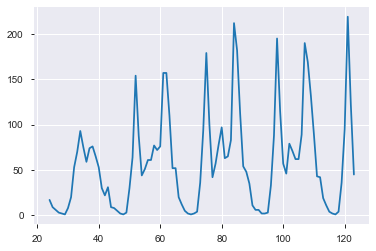

In [15]:
plt.plot(df['cnt_target'][:100])

In [16]:
col_dum = ['season','hr','weathersit','weekday','mnth']
# df = pd.get_dummies(df, columns=col_dum)
for col in col_dum:
    df = pd.get_dummies(df, columns=df.filter(like=col).columns)

In [17]:
df

yr_0  holiday_0  workingday_0  atemp_0  hum_0  windspeed_0  cnt_0  \
24        0          0             0   0.4545   0.88       0.2985     17   
25        0          0             0   0.4394   0.94       0.2537     17   
26        0          0             0   0.4242   1.00       0.2836      9   
27        0          0             0   0.4545   0.94       0.1940      6   
28        0          0             0   0.4545   0.94       0.1940      3   
...     ...        ...           ...      ...    ...          ...    ...   
17373     1          0             1   0.2727   0.48       0.1343    122   
17374     1          0             1   0.2576   0.60       0.1642    119   
17375     1          0             1   0.2576   0.60       0.1642     89   
17376     1          0             1   0.2576   0.60       0.1642     90   
17377     1          0             1   0.2727   0.56       0.1343     61   

       cnt_target  yr_-1  yr_-2  ...  mnth_1_3.0  mnth_1_4.0  mnth_1_5.0  \
24           17.0    0.0    0.0  ...           0           0           0   
25            9.0    0.0    0.0  ...           0           0           0   
26            6.0    0.0    0.0  ...           0           0           0   
27            3.0    0.0    0.0  ...           0           0           0   
28            2.0    0.0    0.0  ...           0           0           0   
...           ...    ...    ...  ...         ...         ...         ...   
17373       119.0    1.0    1.0  ...           0           0           0   
17374        89.0    1.0    1.0  ...           0           0           0   
17375        90.0    1.0    1.0  ...           0           0           0   
17376        61.0    1.0    1.0  ...           0           0           0   
17377        49.0    1.0    1.0  ...           0           0           0   

       mnth_1_6.0  mnth_1_7.0  mnth_1_8.0  mnth_1_9.0  mnth_1_10.0  \
24              0           0           0           0            0   
25              0           0           0           0            0   
26              0           0           0           0            0   
27              0           0           0           0            0   
28              0           0           0           0            0   
...           ...         ...         ...         ...          ...   
17373           0           0           0           0            0   
17374           0           0           0           0            0   
17375           0           0           0           0            0   
17376           0           0           0           0            0   
17377           0           0           0           0            0   

       mnth_1_11.0  mnth_1_12.0  
24               0            0  
25               0            0  
26               0            0  
27               0            0  
28               0            0  
...            ...          ...  
17373            0            1  
17374            0            1  
17375            0            1  
17376            0            1  
17377            0            1  

[17354 rows x 877 columns]

## Feature selection (removal)

In [18]:
df.columns

Index(['yr_0', 'holiday_0', 'workingday_0', 'atemp_0', 'hum_0', 'windspeed_0',
       'cnt_0', 'cnt_target', 'yr_-1', 'yr_-2',
       ...
       'mnth_1_3.0', 'mnth_1_4.0', 'mnth_1_5.0', 'mnth_1_6.0', 'mnth_1_7.0',
       'mnth_1_8.0', 'mnth_1_9.0', 'mnth_1_10.0', 'mnth_1_11.0',
       'mnth_1_12.0'],
      dtype='object', length=877)

In [19]:
target = df.pop('cnt_target')

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [21]:
# X_train = df.head(int(len(df)*0.75))
# X_test = df.tail(int(len(df)*0.25))

# y_train = target.head(int(len(df)*0.75))
# y_test = target.tail(int(len(df)*0.25))


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df, target)

In [24]:
y_train /= max(y_train)
y_test /= max(y_test)

In [23]:
cols = df.columns

# ML1

In [24]:
from regression_ria import regression

## No scaling

In [25]:
ml1_noscale = regression(X_train, X_test, y_train, y_test, cols, scaler='None')
ml1_noscale

Training KNN
Training KNN complete in 115.81839370727539 seconds 

Training Linear Regression
Training Linear Regression complete in 13.004004001617432 seconds 

Training Linear SVM


C:\Users\Justin\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training Linear SVM complete in 74.08059597015381 seconds 

Training Decision Tree
Training Decision Tree complete in 20.68200373649597 seconds 

Training Random Forest


C:\Users\Justin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Random Forest complete in 109.91305208206177 seconds 

Training Gradient Boost
Training Gradient Boost complete in 4942.808990716934 seconds 



Test Accuracy  Train Accuracy     Best Parameters  \
KNN                 9.221654e-01        0.951591  {'n_neighbors': 5}   
Linear Regression  -2.491088e+14        0.933554                  {}   
Linear SVM          8.605620e-01        0.857965      {'tol': 1e-05}   
Decision Tree       9.170742e-01        0.957288    {'max_depth': 9}   
Random Forest       9.495112e-01        0.983475   {'max_depth': 12}   
Gradient Boost      9.600635e-01        0.984438    {'max_depth': 6}   

                      Run Time                                        0  \
KNN                 115.818394                                    [nan]   
Linear Regression    13.004004             (yr_-9, -59137531.151932165)   
Linear SVM           74.080596  (weekday_-8_5.0, -0.012360633628864519)   
Decision Tree        20.682004           (cnt_-2, 0.027829107724942157)   
Random Forest       109.913052           (cnt_-2, 0.027829107724942157)   
Gradient Boost     4942.808991           (cnt_-2, 0.027829107724942157)   

                                                        1  \
KNN                                                 [nan]   
Linear Regression             (yr_-8, -64345178.31958791)   
Linear SVM         (weekday_-8_0.0, 0.017437325441459078)   
Decision Tree              (cnt_-23, 0.13106137627487702)   
Random Forest              (cnt_-23, 0.13106137627487702)   
Gradient Boost             (cnt_-23, 0.13106137627487702)   

                                                        2  
KNN                                                 [nan]  
Linear Regression              (yr_-7, 65178715.02180636)  
Linear SVM         (workingday_-8, -0.023367833609056105)  
Decision Tree                 (cnt_0, 0.7126070443706645)  
Random Forest                 (cnt_0, 0.7126070443706645)  
Gradient Boost                (cnt_0, 0.7126070443706645)

## Standard Scaler

In [26]:
ml1_ss = regression(X_train, X_test, y_train, y_test, cols, scaler='ss')
ml1_ss

Training KNN
Training KNN complete in 857.4044179916382 seconds 

Training Linear Regression
Training Linear Regression complete in 9.450706958770752 seconds 

Training Linear SVM


C:\Users\Justin\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training Linear SVM complete in 197.95472860336304 seconds 

Training Decision Tree
Training Decision Tree complete in 28.43588900566101 seconds 

Training Random Forest


C:\Users\Justin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Random Forest complete in 121.30949211120605 seconds 

Training Gradient Boost
Training Gradient Boost complete in 6196.218952178955 seconds 



Test Accuracy  Train Accuracy     Best Parameters  \
KNN                 8.226255e-01        0.916294  {'n_neighbors': 2}   
Linear Regression  -2.503725e+19        0.933551                  {}   
Linear SVM          8.624574e-01        0.874429      {'tol': 1e-05}   
Decision Tree       9.170283e-01        0.957288    {'max_depth': 9}   
Random Forest       9.496371e-01        0.983491   {'max_depth': 12}   
Gradient Boost      9.600676e-01        0.984438    {'max_depth': 6}   

                      Run Time                                   0  \
KNN                 857.404418                               [nan]   
Linear Regression     9.450707   (weekday_0_6, 12326005408.882103)   
Linear SVM          197.954729  (mnth_-8_1.0, 0.08725995956063225)   
Decision Tree        28.435889      (cnt_-2, 0.027829107724942157)   
Random Forest       121.309492      (cnt_-2, 0.027829107724942157)   
Gradient Boost     6196.218952      (cnt_-2, 0.027829107724942157)   

                                                1  \
KNN                                         [nan]   
Linear Regression    (yr_-3, -13122306557.056488)   
Linear SVM         (cnt_-23, 0.09583955625884653)   
Decision Tree      (cnt_-23, 0.13106137627487702)   
Random Forest      (cnt_-23, 0.13106137627487702)   
Gradient Boost     (cnt_-23, 0.13106137627487702)   

                                                    2  
KNN                                             [nan]  
Linear Regression  (workingday_0, 18476434581.849293)  
Linear SVM               (cnt_0, 0.14672924903924586)  
Decision Tree             (cnt_0, 0.7126070443706645)  
Random Forest             (cnt_0, 0.7126070443706645)  
Gradient Boost            (cnt_0, 0.7126070443706645)

## MinMaxScaler

In [27]:
ml1_mm = regression(X_train, X_test, y_train, y_test, cols, scaler='mm')
ml1_mm

Training KNN
Training KNN complete in 663.5264897346497 seconds 

Training Linear Regression
Training Linear Regression complete in 7.213944911956787 seconds 

Training Linear SVM


C:\Users\Justin\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training Linear SVM complete in 71.28645181655884 seconds 

Training Decision Tree
Training Decision Tree complete in 26.81619381904602 seconds 

Training Random Forest


C:\Users\Justin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Random Forest complete in 121.08298468589783 seconds 

Training Gradient Boost
Training Gradient Boost complete in 6177.6429398059845 seconds 



Test Accuracy  Train Accuracy     Best Parameters  \
KNN                 8.141003e-01        0.917486  {'n_neighbors': 2}   
Linear Regression  -4.042397e+19        0.933554                  {}   
Linear SVM          8.090859e-01        0.810199      {'tol': 1e-05}   
Decision Tree       9.170668e-01        0.957288    {'max_depth': 9}   
Random Forest       9.496478e-01        0.983464   {'max_depth': 12}   
Gradient Boost      9.600639e-01        0.984438    {'max_depth': 6}   

                      Run Time                                   0  \
KNN                 663.526490                               [nan]   
Linear Regression     7.213945  (workingday_-2, 31859119934.53623)   
Linear SVM           71.286452     (cnt_-24, -0.41986049039485096)   
Decision Tree        26.816194      (cnt_-2, 0.027829107724942157)   
Random Forest       121.082985      (cnt_-2, 0.027829107724942157)   
Gradient Boost     6177.642940      (cnt_-2, 0.027829107724942157)   

                                                1  \
KNN                                         [nan]   
Linear Regression      (yr_-9, 32038288080.25241)   
Linear SVM          (cnt_-23, 0.5648300982835828)   
Decision Tree      (cnt_-23, 0.13106137627487702)   
Random Forest      (cnt_-23, 0.13106137627487702)   
Gradient Boost     (cnt_-23, 0.13106137627487702)   

                                              2  
KNN                                       [nan]  
Linear Regression  (yr_-16, 32447959315.360706)  
Linear SVM          (cnt_0, 0.8266304758514997)  
Decision Tree       (cnt_0, 0.7126070443706645)  
Random Forest       (cnt_0, 0.7126070443706645)  
Gradient Boost      (cnt_0, 0.7126070443706645)

In [28]:
test_ml1 = pd.DataFrame()

test_ml1['No Scaler'] = ml1_noscale['Test Accuracy']
test_ml1['Standard Scaler'] = ml1_ss['Test Accuracy']
test_ml1['Min-Max Scaler'] = ml1_mm['Test Accuracy']

In [29]:
runtime_ml1 = pd.DataFrame()

runtime_ml1['No Scaler (s)'] = ml1_noscale['Run Time']
runtime_ml1['Standard Scaler (s)'] = ml1_ss['Run Time']
runtime_ml1['Min-Max Scaler (s)'] = ml1_mm['Run Time']

In [30]:
print(runtime_ml1.round(2).to_latex())#.apply(lambda x: x.astype(str) + "s")

\begin{tabular}{lrrr}
\toprule
{} &  No Scaler (s) &  Standard Scaler (s) &  Min-Max Scaler (s) \\
\midrule
KNN               &         115.82 &               857.40 &              663.53 \\
Linear Regression &          13.00 &                 9.45 &                7.21 \\
Linear SVM        &          74.08 &               197.95 &               71.29 \\
Decision Tree     &          20.68 &                28.44 &               26.82 \\
Random Forest     &         109.91 &               121.31 &              121.08 \\
Gradient Boost    &        4942.81 &              6196.22 &             6177.64 \\
\bottomrule
\end{tabular}



In [31]:
# print((test_ml1*100).round(2).to_latex())
print((test_ml1*100).round(2).apply(lambda x: x.astype(str)+"%", axis=1).to_latex())

\begin{tabular}{llll}
\toprule
{} &                 No Scaler &        Standard Scaler &           Min-Max Scaler \\
\midrule
KNN               &                    92.22\% &                 82.26\% &                   81.41\% \\
Linear Regression &  -2.4910878152434304e+16\% &  -2.5037250154995e+21\% &  -4.042397461273723e+21\% \\
Linear SVM        &                    86.06\% &                 86.25\% &                   80.91\% \\
Decision Tree     &                    91.71\% &                  91.7\% &                   91.71\% \\
Random Forest     &                    94.95\% &                 94.96\% &                   94.96\% \\
Gradient Boost    &                    96.01\% &                 96.01\% &                   96.01\% \\
\bottomrule
\end{tabular}



<p style="font-size:32px"> <b>ACCURACY TO BEAT FROM ML: 95.57%</b></p>

# ML2

## No scaling

In [ ]:
# mm=MinMaxScaler()
# ss = StandardScaler()
# X_train = ss.fit_transform(X_train)
# X_test = ss.transform(X_test)


### Manual Implementation

In [ ]:
import numpy as np

In [71]:
y_train=np.array(y_train, ndmin=2).T

In [ ]:
print(X_train.values.shape, y_train.shape)

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

X=X_train.values
y=y_train

gamma1=1e-1 #input-hidden bigger
gamma2=1e-1 #Hidden1-Hidden2 smaller
gamma3=1e-2 #Hidden2-Hidden3 smaller
gamma4=1e-2 #Hidden3-Hidden4 smaller
gamma5=1e-3 #Hidden4-Hidden5 smaller
gamma6=1e-4 #Hidden5-Hidden6 smaller
gamma7=1e-5 #Hidden6-output

no_hidden1=X.shape[1] #No of hidden nodes
no_hidyyden2=X.shape[1]//2 #No of hidden nodes
no_hidden3=X.shape[1]//4 #No of hidden nodes
no_hidden4=X.shape[1]//8 #No of hidden nodes
no_hidden5=X.shape[1]//16 #No of hidden nodes
no_hidden6=X.shape[1]//32 #No of hidden nodes
no_inputs=len(X[0])

def nonlin_relu(x,deriv=False):
    relu = np.zeros_like(x)
    if(deriv==True):
        relu[x>=0] = 1
        return relu
    relu[x>=0] = x[x>=0]
    return relu


def nonlin_sigmoid(x,deriv=False):
    sigmoid=1./(1.0+np.exp(-x))
    if(deriv==True):
        return 1.*sigmoid*(1-sigmoid)
    return sigmoid


np.random.seed(42)

# randomly initialize our weights with mean 0
w0 = 2*np.random.random((no_inputs,no_hidden1)) - 1
w1 = 2*np.random.random((no_hidden1,no_hidden2)) - 1
w2 = 2*np.random.random((no_hidden2,no_hidden3)) - 1
w3 = 2*np.random.random((no_hidden3,no_hidden4)) - 1
w4 = 2*np.random.random((no_hidden4,no_hidden5)) - 1
w5 = 2*np.random.random((no_hidden5,no_hidden6)) - 1
w6 = 2*np.random.random((no_hidden6,1)) - 1

r_test_noscale_manual = []
r_train_noscale_manual = []
iters = []

for iter in range(10000):

	# Feed forward through layers 0, 1, and 2
    layer0 = X
    layer1 = nonlin_relu(np.dot(layer0,w0))
    layer2 = nonlin_relu(np.dot(layer1,w1))
    layer3 = nonlin_relu(np.dot(layer2,w2))
    layer4 = nonlin_relu(np.dot(layer3,w3))
    layer5 = nonlin_relu(np.dot(layer4,w4))
    layer6 = nonlin_relu(np.dot(layer5,w5))
    layer7 = nonlin_sigmoid(np.dot(layer6,w6))

    # Error Function
    layer7_error = y - layer7
    
    if (iter% 10) == 0:
        #Check here the results
        layer0_test = X_test
        layer1_test = nonlin_relu(np.dot(layer0_test,w0))
        layer2_test = nonlin_relu(np.dot(layer1_test,w1))
        layer3_test = nonlin_relu(np.dot(layer2_test,w2))
        layer4_test = nonlin_relu(np.dot(layer3_test,w3))
        layer5_test = nonlin_relu(np.dot(layer4_test,w4))
        layer6_test = nonlin_relu(np.dot(layer5_test,w5))
        layer7_test = nonlin_sigmoid(np.dot(layer6_test,w6))
        iters.append(iter)
        test_acc = r2_score(layer7_test, y_test)
        train_acc = r2_score(layer7, y)
        r_test_noscale_manual.append(test_acc)
        r_train_noscale_manual.append(train_acc)
        if (iter%10)==0:
            print ("Iteration No.=",iter, "Train Set R2=", train_acc, "Test Set R2=", test_acc)
        
 #Gradients
    layer7_delta = layer7_error*nonlin_sigmoid(np.dot(layer6,w6),deriv=True)
    layer6_delta = layer7_delta.dot(w6.T)*nonlin_relu(np.dot(layer5,w5),deriv=True)
    layer5_delta = layer6_delta.dot(w5.T)*nonlin_relu(np.dot(layer4,w4),deriv=True)
    layer4_delta = layer5_delta.dot(w4.T)*nonlin_relu(np.dot(layer3,w3),deriv=True)
    layer3_delta = layer4_delta.dot(w3.T)*nonlin_relu(np.dot(layer2,w2),deriv=True)
    layer2_delta = layer3_delta.dot(w2.T)*nonlin_relu(np.dot(layer1,w1),deriv=True)
    layer1_delta = layer2_delta.dot(w1.T)*nonlin_relu(np.dot(layer0,w0),deriv=True)

    w6 += gamma7*layer6.T.dot(layer7_delta)
    w5 += gamma6*layer5.T.dot(layer6_delta)
    w4 += gamma5*layer4.T.dot(layer5_delta)
    w3 += gamma4*layer3.T.dot(layer4_delta)
    w2 += gamma3*layer2.T.dot(layer3_delta)
    w1 += gamma2*layer1.T.dot(layer2_delta)
    w0 += gamma1*layer0.T.dot(layer1_delta)



C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 0 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 10 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 20 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 30 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 40 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 50 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 60 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 70 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 80 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 90 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 100 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 110 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 120 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 130 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 140 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 150 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 160 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 170 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 180 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 190 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 200 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 210 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 220 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 230 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 240 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 250 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 260 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 270 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 280 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 290 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 300 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 310 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 320 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 330 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 340 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 350 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 360 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 370 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 380 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 390 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 400 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 410 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 420 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 430 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 440 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 450 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 460 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 470 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 480 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 490 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 500 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 510 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 520 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 530 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 540 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 550 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 560 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 570 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 580 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 590 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 600 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 610 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 620 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 630 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 640 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 650 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 660 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 670 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 680 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 690 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 700 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 710 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 720 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 730 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 740 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 750 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 760 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 770 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 780 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 790 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 800 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 810 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 820 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 830 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 840 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 850 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 860 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 870 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 880 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 890 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 900 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 910 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 920 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 930 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 940 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 950 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 960 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 970 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 980 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 990 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1000 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1010 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1020 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1030 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1040 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1050 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1060 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1070 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1080 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1090 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1100 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1110 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1120 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1130 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1140 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1150 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1160 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1170 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1180 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1190 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1200 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1210 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1220 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1230 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1240 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1250 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1260 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1270 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1280 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1290 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1300 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1310 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1320 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1330 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1340 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1350 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1360 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1370 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1380 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1390 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1400 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1410 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1420 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1430 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1440 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1450 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1460 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1470 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1480 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1490 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1500 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1510 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1520 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1530 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1540 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1550 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1560 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1570 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1580 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1590 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1600 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1610 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1620 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1630 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1640 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1650 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1660 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1670 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1680 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1690 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1700 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1710 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1720 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1730 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1740 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1750 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1760 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1770 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1780 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1790 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1800 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1810 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1820 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1830 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1840 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1850 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1860 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1870 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1880 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1890 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1900 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1910 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1920 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1930 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1940 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1950 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1960 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1970 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1980 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 1990 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2000 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2010 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2020 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2030 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2040 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2050 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2060 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2070 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2080 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2090 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2100 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2110 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2120 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2130 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2140 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2150 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2160 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2170 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2180 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2190 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2200 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2210 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2220 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2230 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2240 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2250 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2260 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2270 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2280 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2290 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2300 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2310 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2320 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2330 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2340 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2350 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2360 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2370 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2380 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2390 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2400 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2410 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2420 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2430 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2440 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2450 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2460 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2470 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2480 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2490 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2500 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2510 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2520 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2530 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2540 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2550 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2560 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2570 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2580 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2590 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2600 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2610 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2620 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2630 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2640 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2650 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2660 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2670 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2680 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2690 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2700 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2710 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2720 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2730 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2740 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2750 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2760 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2770 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2780 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2790 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2800 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2810 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2820 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2830 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2840 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2850 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2860 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2870 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2880 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2890 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2900 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2910 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2920 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2930 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2940 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2950 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2960 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2970 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2980 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 2990 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3000 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3010 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3020 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3030 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3040 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3050 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3060 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3070 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3080 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3090 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3100 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3110 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3120 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3130 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3140 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3150 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3160 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3170 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3180 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3190 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3200 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3210 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3220 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3230 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3240 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3250 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3260 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3270 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3280 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3290 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3300 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3310 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3320 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3330 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3340 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3350 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3360 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3370 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3380 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3390 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3400 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3410 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3420 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3430 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3440 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3450 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3460 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3470 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3480 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3490 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3500 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3510 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3520 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3530 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3540 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3550 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3560 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3570 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3580 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3590 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3600 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3610 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3620 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3630 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3640 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3650 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3660 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3670 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3680 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3690 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3700 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3710 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3720 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3730 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3740 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3750 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3760 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3770 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3780 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3790 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3800 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3810 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3820 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3830 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3840 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3850 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3860 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3870 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3880 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3890 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3900 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3910 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3920 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3930 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3940 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3950 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3960 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3970 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3980 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 3990 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4000 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4010 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4020 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4030 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4040 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4050 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4060 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4070 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4080 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4090 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4100 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4110 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4120 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4130 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4140 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4150 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4160 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4170 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4180 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4190 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4200 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4210 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4220 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4230 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4240 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4250 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4260 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4270 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4280 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4290 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4300 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp
C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4310 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506
Iteration No.= 4320 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4330 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4340 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4350 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4360 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4370 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4380 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4390 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4400 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4410 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4420 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4430 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4440 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4450 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4460 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4470 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4480 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4490 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4500 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4510 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4520 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4530 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4540 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4550 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4560 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4570 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4580 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4590 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4600 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4610 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4620 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4630 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4640 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4650 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4660 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4670 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4680 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4690 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4700 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4710 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4720 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4730 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4740 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4750 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4760 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4770 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4780 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4790 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4800 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4810 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4820 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4830 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4840 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4850 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4860 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4870 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4880 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4890 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4900 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4910 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4920 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4930 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4940 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4950 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4960 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4970 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4980 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 4990 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5000 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5010 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5020 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5030 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5040 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5050 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5060 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5070 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5080 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5090 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5100 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5110 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5120 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5130 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5140 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5150 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5160 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5170 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5180 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5190 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5200 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5210 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5220 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5230 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5240 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5250 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5260 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5270 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5280 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5290 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5300 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5310 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5320 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5330 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5340 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5350 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5360 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5370 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5380 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5390 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5400 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5410 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5420 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5430 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5440 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5450 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5460 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5470 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5480 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5490 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5500 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5510 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5520 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5530 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5540 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5550 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5560 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5570 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5580 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5590 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5600 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5610 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5620 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5630 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5640 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5650 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5660 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5670 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5680 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5690 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5700 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5710 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5720 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5730 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5740 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5750 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5760 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5770 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5780 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5790 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5800 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5810 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5820 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5830 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5840 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5850 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5860 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5870 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5880 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5890 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5900 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5910 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5920 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5930 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5940 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5950 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5960 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5970 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5980 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 5990 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6000 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6010 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6020 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6030 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6040 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6050 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6060 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6070 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6080 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6090 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6100 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6110 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6120 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6130 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6140 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6150 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6160 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6170 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6180 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6190 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6200 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6210 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6220 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6230 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6240 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6250 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6260 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6270 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6280 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6290 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6300 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6310 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6320 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6330 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6340 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6350 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6360 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6370 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6380 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6390 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6400 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6410 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6420 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6430 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6440 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6450 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6460 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6470 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6480 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6490 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6500 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6510 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6520 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6530 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6540 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6550 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6560 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6570 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6580 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6590 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6600 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6610 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6620 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6630 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6640 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6650 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6660 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6670 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6680 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6690 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6700 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6710 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6720 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6730 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6740 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6750 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6760 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6770 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6780 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6790 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6800 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6810 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6820 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6830 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6840 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6850 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6860 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6870 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6880 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6890 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6900 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6910 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6920 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6930 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6940 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6950 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6960 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6970 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6980 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 6990 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 7000 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 7010 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 7020 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 7030 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 7040 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 7050 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 7060 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 7070 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 7080 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 7090 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Iteration No.= 7100 Train Set R2= -3.4580349269424593 Test Set R2= -3.5888004945090506


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


In [ ]:
fig, ax = plt.subplots()
ax.plot(iters, r_train_noscale_manual, label="Train Accuracy")
ax.plot(iters, r_test_noscale_manual, label="Test Accuracy")
ax.legend()

### Keras

In [46]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [47]:
max_features=1000
def get_compiled_model():
    model = keras.Sequential([
    layers.Dense(X_train.shape[1], kernel_initializer='normal', activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(X_train.shape[1]//2, kernel_initializer='normal', activation='relu'),
    layers.Dense(X_train.shape[1]//4, kernel_initializer='normal', activation='relu'),
    layers.Dense(X_train.shape[1]//8, kernel_initializer='normal', activation='relu'),
#     layers.Dense(X_train.shape[1]//16, kernel_initializer='normal', activation='relu'),
#     layers.Dense(X_train.shape[1]//32, kernel_initializer='normal', activation='relu'),
    layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                loss='mse',
                metrics=['mse', 'mae', 'mape', coeff_determination])
    return model

from tensorflow.keras import backend as K

def coeff_determination(y_true, y_pred):
    from tensorflow.keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [48]:
model = get_compiled_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 876)               768252    
_________________________________________________________________
dense_15 (Dense)             (None, 438)               384126    
_________________________________________________________________
dense_16 (Dense)             (None, 219)               96141     
_________________________________________________________________
dense_17 (Dense)             (None, 109)               23980     
_________________________________________________________________
dense_18 (Dense)             (None, 54)                5940      
_________________________________________________________________
dense_19 (Dense)             (None, 27)                1485      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [50]:
epochs = []
r_test_noscale=[]
r_train_noscale=[]

for epoch in range(100):
    print(epoch)
    model.fit(X_train, y_train, epochs=1)
    y_pred = model.predict(X_test)
    r1=r2_score(y_test, y_pred)
    r_test_noscale.append(r1)
    r2 = r2_score(y_train, model.predict(X_train))
    r_train_noscale.append(r2)
    epochs.append(epoch)

0
Train on 13015 samples
13015/13015 [==============================] - 3s 232us/sample - loss: 0.0722 - mean_squared_error: 0.0722 - mean_absolute_error: 0.1943 - mean_absolute_percentage_error: 100.0000 - coeff_determination: -1.1944
1
Train on 13015 samples
13015/13015 [==============================] - 3s 259us/sample - loss: 0.0722 - mean_squared_error: 0.0722 - mean_absolute_error: 0.1943 - mean_absolute_percentage_error: 100.0000 - coeff_determination: -1.1966 - loss: 0.0725 - mean_squared_error: 0.0725 - mean_absolute_error: 0.1948 - mean_absolute_p
2
Train on 13015 samples
13015/13015 [==============================] - 3s 231us/sample - loss: 0.0722 - mean_squared_error: 0.0722 - mean_absolute_error: 0.1943 - mean_absolute_percentage_error: 100.0000 - coeff_determination: -1.2023
3
Train on 13015 samples
13015/13015 [==============================] - 3s 231us/sample - loss: 0.0722 - mean_squared_error: 0.0722 - mean_absolute_error: 0.1943 - mean_absolute_percentage_error: 100.

13015/13015 [==============================] - 3s 223us/sample - loss: 0.0722 - mean_squared_error: 0.0722 - mean_absolute_error: 0.1943 - mean_absolute_percentage_error: 100.0000 - coeff_determination: -1.2025
64
Train on 13015 samples
13015/13015 [==============================] - 3s 216us/sample - loss: 0.0722 - mean_squared_error: 0.0722 - mean_absolute_error: 0.1943 - mean_absolute_percentage_error: 100.0000 - coeff_determination: -1.1997
65
Train on 13015 samples
13015/13015 [==============================] - 3s 221us/sample - loss: 0.0722 - mean_squared_error: 0.0722 - mean_absolute_error: 0.1943 - mean_absolute_percentage_error: 100.0000 - coeff_determination: -1.2019
66
Train on 13015 samples
13015/13015 [==============================] - 3s 221us/sample - loss: 0.0722 - mean_squared_error: 0.0722 - mean_absolute_error: 0.1943 - mean_absolute_percentage_error: 100.0000 - coeff_determination: -1.2142
67
Train on 13015 samples
13015/13015 [==============================] - 3s 22

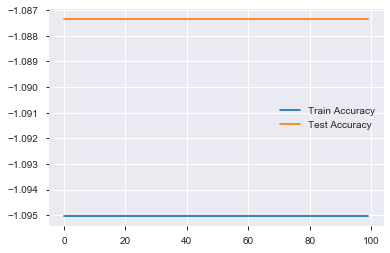

In [51]:
fig, ax = plt.subplots()
ax.plot(epochs, r_train_noscale, label="Train Accuracy")
ax.plot(epochs, r_test_noscale, label="Test Accuracy")
ax.legend()

In [52]:
max(r_test_noscale)

-1.08733122296095

In [ ]:
### r_test_noscale[-1]

## Standard Scaler

In [42]:
# mm=MinMaxScaler()
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)


### Manual Implementation

In [ ]:
import numpy as np
from sklearn.metrics import r2_score, accuracy_score

X=X_train_ss
y=y_train

gamma1=.00001 #input-hidden bigger
gamma2=.00001 #Hidden1-Hidden2 smaller
gamma3=.000001 #Hidden2-Hidden3 smaller
gamma4=.000001 #Hidden3-Hidden4 smaller
gamma5=.0000001 #Hidden4-Hidden5 smaller
gamma6=.0000001 #Hidden5-Hidden6 smaller
gamma7=.00000001 #Hidden6-output

no_hidden1=X.shape[1] #No of hidden nodes
no_hidden2=X.shape[1]//2 #No of hidden nodes
no_hidden3=X.shape[1]//4 #No of hidden nodes
no_hidden4=X.shape[1]//8 #No of hidden nodes
no_hidden5=X.shape[1]//16 #No of hidden nodes
no_hidden6=X.shape[1]//32 #No of hidden nodes
no_inputs=len(X[0])

def nonlin_relu(x,deriv=False):
    relu = np.zeros_like(x)
    if(deriv==True):
        relu[x>=0] = 1
        return relu
    relu[x>=0] = x[x>=0]
    return relu


def nonlin_sigmoid(x,deriv=False):
    sigmoid=1./(1.0+np.exp(-x))
    if(deriv==True):
        return 1.*sigmoid*(1-sigmoid)
    return sigmoid


np.random.seed(42)

# randomly initialize our weights with mean 0
w0 = 2*np.random.random((no_inputs,no_hidden1)) - 1
w1 = 2*np.random.random((no_hidden1,no_hidden2)) - 1
w2 = 2*np.random.random((no_hidden2,no_hidden3)) - 1
w3 = 2*np.random.random((no_hidden3,no_hidden4)) - 1
w4 = 2*np.random.random((no_hidden4,no_hidden5)) - 1
w5 = 2*np.random.random((no_hidden5,no_hidden6)) - 1
w6 = 2*np.random.random((no_hidden6,1)) - 1

r_test_ss_manual = []
r_train_ss_manual = []
iters = []

for iter in range(10000):

	# Feed forward through layers 0, 1, and 2
    layer0 = X
    layer1 = nonlin_relu(np.dot(layer0,w0))
    layer2 = nonlin_relu(np.dot(layer1,w1))
    layer3 = nonlin_relu(np.dot(layer2,w2))
    layer4 = nonlin_relu(np.dot(layer3,w3))
    layer5 = nonlin_relu(np.dot(layer4,w4))
    layer6 = nonlin_relu(np.dot(layer5,w5))
    layer7 = nonlin_sigmoid(np.dot(layer6,w6))

    # Error Function
    layer7_error = y - layer7
    
    if (iter% 10) == 0:
        #Check here the results
        layer0_test = X_test_ss
        layer1_test = nonlin_relu(np.dot(layer0_test,w0))
        layer2_test = nonlin_relu(np.dot(layer1_test,w1))
        layer3_test = nonlin_relu(np.dot(layer2_test,w2))
        layer4_test = nonlin_relu(np.dot(layer3_test,w3))
        layer5_test = nonlin_relu(np.dot(layer4_test,w4))
        layer6_test = nonlin_relu(np.dot(layer5_test,w5))
        layer7_test = nonlin_sigmoid(np.dot(layer6_test,w6))
        iters.append(iter)
        test_acc = accuracy_score(layer7_test, y_test)
        train_acc = accuracy_score(layer7, y)
        r_test_ss_manual.append(test_acc)
        r_train_ss_manual.append(train_acc)
        if (iter%10)==0:
            print ("Iteration No.=",iter, "Train Set R2=", train_acc, "Test Set R2=", test_acc)
        
 #Gradients
    layer7_delta = layer7_error*nonlin_sigmoid(np.dot(layer6,w6),deriv=True)
    layer6_delta = layer7_delta.dot(w6.T)*nonlin_relu(np.dot(layer5,w5),deriv=True)
    layer5_delta = layer6_delta.dot(w5.T)*nonlin_relu(np.dot(layer4,w4),deriv=True)
    layer4_delta = layer5_delta.dot(w4.T)*nonlin_relu(np.dot(layer3,w3),deriv=True)
    layer3_delta = layer4_delta.dot(w3.T)*nonlin_relu(np.dot(layer2,w2),deriv=True)
    layer2_delta = layer3_delta.dot(w2.T)*nonlin_relu(np.dot(layer1,w1),deriv=True)
    layer1_delta = layer2_delta.dot(w1.T)*nonlin_relu(np.dot(layer0,w0),deriv=True)

    w6 += gamma7*layer6.T.dot(layer7_delta)
    w5 += gamma6*layer5.T.dot(layer6_delta)
    w4 += gamma5*layer4.T.dot(layer5_delta)
    w3 += gamma4*layer3.T.dot(layer4_delta)
    w2 += gamma3*layer2.T.dot(layer3_delta)
    w1 += gamma2*layer1.T.dot(layer2_delta)
    w0 += gamma1*layer0.T.dot(layer1_delta)



In [ ]:
fig, ax = plt.subplots()
ax.plot(iters, r_train_ss_manual, label="Train Accuracy")
ax.plot(iters, r_test_ss_manual, label="Test Accuracy")
ax.legend()
ax.set_ylim(-0.5, 1)

In [ ]:
max(r_test_ss_manual)

### Keras

In [53]:
model = get_compiled_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 876)               768252    
_________________________________________________________________
dense_22 (Dense)             (None, 438)               384126    
_________________________________________________________________
dense_23 (Dense)             (None, 219)               96141     
_________________________________________________________________
dense_24 (Dense)             (None, 109)               23980     
_________________________________________________________________
dense_25 (Dense)             (None, 54)                5940      
_________________________________________________________________
dense_26 (Dense)             (None, 27)                1485      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

In [54]:
epochs = []
r_test_ss=[]
r_train_ss=[]

for epoch in range(100):
    print(epoch)
    model.fit(X_train_ss, y_train, epochs=1)
    y_pred = model.predict(X_test_ss)
    r1=r2_score(y_test, y_pred)
    r_test_ss.append(r1)
    r2 = r2_score(y_train, model.predict(X_train_ss))
    r_train_ss.append(r2)
    epochs.append(epoch)

0
Train on 13015 samples
13015/13015 [==============================] - 3s 242us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 185.6566 - coeff_determination: 0.7301
1
Train on 13015 samples
13015/13015 [==============================] - 3s 227us/sample - loss: 0.0031 - mean_squared_error: 0.0031 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 97.4145 - coeff_determination: 0.8983
2
Train on 13015 samples
13015/13015 [==============================] - 3s 244us/sample - loss: 0.0024 - mean_squared_error: 0.0024 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 71.8743 - coeff_determination: 0.9226
3
Train on 13015 samples
13015/13015 [==============================] - 3s 229us/sample - loss: 0.0020 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 63.0688 - coeff_determination: 0.9338 - loss: 0.0022 - mean_squared_error: 0.0022 - mean_abso
4
Train

13015/13015 [==============================] - 3s 230us/sample - loss: 2.1383e-04 - mean_squared_error: 2.1383e-04 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 18.9420 - coeff_determination: 0.9930 - loss: 2.1697e-04 - mean_squared_error: 2.1697e-04 - mean_
64
Train on 13015 samples
13015/13015 [==============================] - 3s 229us/sample - loss: 3.4602e-04 - mean_squared_error: 3.4602e-04 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 21.1680 - coeff_determination: 0.9885
65
Train on 13015 samples
13015/13015 [==============================] - 3s 231us/sample - loss: 3.5277e-04 - mean_squared_error: 3.5277e-04 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 20.9016 - coeff_determination: 0.9882
66
Train on 13015 samples
13015/13015 [==============================] - 3s 229us/sample - loss: 2.3640e-04 - mean_squared_error: 2.3640e-04 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 19.3184 - coeff_determination: 0

In [55]:
fig, ax = plt.subplots()
ax.plot(epochs, r_train_ss, label="Train Accuracy")
ax.plot(epochs, r_test_ss, label="Test Accuracy")
ax.legend()

In [56]:
max(r_test_ss)

0.9628297266786131

In [57]:
r_test_ss[-1]

0.9610177826325358

## MinMaxScaler

In [66]:
mm=MinMaxScaler()
X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)


### Manual Implementation

In [ ]:
print(X_train_mm.shape, y_train.shape)

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

X=X_train_mm
y=y_train

gamma1=.00001 #input-hidden bigger
gamma2=.00001 #Hidden1-Hidden2 smaller
gamma3=.000001 #Hidden2-Hidden3 smaller
gamma4=.000001 #Hidden3-Hidden4 smaller
gamma5=.0000001 #Hidden4-Hidden5 smaller
gamma6=.0000001 #Hidden5-Hidden6 smaller
gamma7=.00000001 #Hidden6-output

no_hidden1=X.shape[1] #No of hidden nodes
no_hidden2=X.shape[1]//2 #No of hidden nodes
no_hidden3=X.shape[1]//4 #No of hidden nodes
no_hidden4=X.shape[1]//8 #No of hidden nodes
no_hidden5=X.shape[1]//16 #No of hidden nodes
no_hidden6=X.shape[1]//32 #No of hidden nodes
no_inputs=len(X[0])

def nonlin_relu(x,deriv=False):
    relu = np.zeros_like(x)
    if(deriv==True):
        relu[x>=0] = 1
        return relu
    relu[x>=0] = x[x>=0]
    return relu


def nonlin_sigmoid(x,deriv=False):
    sigmoid=1./(1.0+np.exp(-x))
    if(deriv==True):
        return 1.*sigmoid*(1-sigmoid)
    return sigmoid


np.random.seed(42)

# randomly initialize our weights with mean 0
w0 = 2*np.random.random((no_inputs,no_hidden1)) - 1
w1 = 2*np.random.random((no_hidden1,no_hidden2)) - 1
w2 = 2*np.random.random((no_hidden2,no_hidden3)) - 1
w3 = 2*np.random.random((no_hidden3,no_hidden4)) - 1
w4 = 2*np.random.random((no_hidden4,no_hidden5)) - 1
w5 = 2*np.random.random((no_hidden5,no_hidden6)) - 1
w6 = 2*np.random.random((no_hidden6,1)) - 1

r_test_mm_manual = []
r_train_mm_manual = []
iters = []

for iter in range(10000):

	# Feed forward through layers 0, 1, and 2
    layer0 = X
    layer1 = nonlin_relu(np.dot(layer0,w0))
    layer2 = nonlin_relu(np.dot(layer1,w1))
    layer3 = nonlin_relu(np.dot(layer2,w2))
    layer4 = nonlin_relu(np.dot(layer3,w3))
    layer5 = nonlin_relu(np.dot(layer4,w4))
    layer6 = nonlin_relu(np.dot(layer5,w5))
    layer7 = nonlin_sigmoid(np.dot(layer6,w6))

    # Error Function
    layer7_error = y - layer7
    
    if (iter% 10) == 0:
        #Check here the results
        layer0_test = X_test_mm
        layer1_test = nonlin_relu(np.dot(layer0_test,w0))
        layer2_test = nonlin_relu(np.dot(layer1_test,w1))
        layer3_test = nonlin_relu(np.dot(layer2_test,w2))
        layer4_test = nonlin_relu(np.dot(layer3_test,w3))
        layer5_test = nonlin_relu(np.dot(layer4_test,w4))
        layer6_test = nonlin_relu(np.dot(layer5_test,w5))
        layer7_test = nonlin_sigmoid(np.dot(layer6_test,w6))
        iters.append(iter)
        test_acc = r2_score(layer7_test, y_test)
        train_acc = r2_score(layer7, y)
        r_test_mm_manual.append(test_acc)
        r_train_mm_manual.append(train_acc)
        if (iter%10)==0:
            print ("Iteration No.=",iter, "Train Set R2=", train_acc, "Test Set R2=", test_acc)
        
 #Gradients
    layer7_delta = layer7_error*nonlin_sigmoid(np.dot(layer6,w6),deriv=True)
    layer6_delta = layer7_delta.dot(w6.T)*nonlin_relu(np.dot(layer5,w5),deriv=True)
    layer5_delta = layer6_delta.dot(w5.T)*nonlin_relu(np.dot(layer4,w4),deriv=True)
    layer4_delta = layer5_delta.dot(w4.T)*nonlin_relu(np.dot(layer3,w3),deriv=True)
    layer3_delta = layer4_delta.dot(w3.T)*nonlin_relu(np.dot(layer2,w2),deriv=True)
    layer2_delta = layer3_delta.dot(w2.T)*nonlin_relu(np.dot(layer1,w1),deriv=True)
    layer1_delta = layer2_delta.dot(w1.T)*nonlin_relu(np.dot(layer0,w0),deriv=True)
    print(layer6.T.dot(layer7_delta).sum(),
          layer5.T.dot(layer6_delta).sum(),
          layer4.T.dot(layer5_delta).sum(),
          layer3.T.dot(layer4_delta).sum(),
          layer2.T.dot(layer3_delta).sum(),
          layer1.T.dot(layer2_delta).sum(),
          layer0.T.dot(layer1_delta).sum())
    w6 += gamma7*layer6.T.dot(layer7_delta)
    w5 += gamma6*layer5.T.dot(layer6_delta)
    w4 += gamma5*layer4.T.dot(layer5_delta)
    w3 += gamma4*layer3.T.dot(layer4_delta)
    w2 += gamma3*layer2.T.dot(layer3_delta)
    w1 += gamma2*layer1.T.dot(layer2_delta)
    w0 += gamma1*layer0.T.dot(layer1_delta)



In [ ]:
import numpy as np
from sklearn.metrics import r2_score

X=X_train_mm
y=y_train

gamma1=.001 #input to hidden bigger
gamma2=.0001 #Hidden1 to Hidden2 smaller
gamma3=.0001 #Hidden2 to Hidden3 smaller
gamma4=.00001 #Hidden3 to Hidden4 smaller

no_hidden1=62 #No of hidden nodes
no_hidden2=31 #No of hidden nodes
no_hidden3=15 #No of hidden nodes
no_inputs=len(X[0])

def nonlin_relu(x,deriv=False):
    relu = np.zeros_like(x)
    if(deriv==True):
        relu[x>=0] = 1
        return relu
    relu[x>=0] = x[x>=0]
    return relu


def nonlin_sigmoid(x,deriv=False):
    sigmoid=1./(1.0+np.exp(-x))
    if(deriv==True):
        return 1.*sigmoid*(1-sigmoid)
    return sigmoid


np.random.seed(42)

# randomly initialize our weights with mean 0
w0 = 2*np.random.random((no_inputs,no_hidden1)) - 1
w1 = 2*np.random.random((no_hidden1,no_hidden2)) - 1
w2 = 2*np.random.random((no_hidden2,no_hidden3)) - 1
w3 = 2*np.random.random((no_hidden3,1)) - 1


r_test_mm_manual = []
r_train_mm_manual = []
iters = []

for iter in range(10000):

	# Feed forward through layers 0, 1, and 2
    layer0 = X
    layer1 = nonlin_relu(np.dot(layer0,w0))
    layer2 = nonlin_relu(np.dot(layer1,w1))
    layer3 = nonlin_relu(np.dot(layer2,w2))
    layer4 = nonlin_sigmoid(np.dot(layer3,w3))

    # Error Function
    layer4_error = y - layer4
    
    if (iter% 10) == 0:
        #Check here the results
        layer0_test = X_test_mm
        layer1_test = nonlin_relu(np.dot(layer0_test,w0))
        layer2_test = nonlin_relu(np.dot(layer1_test,w1))
        layer3_test = nonlin_relu(np.dot(layer2_test,w2))
        layer4_test = nonlin_sigmoid(np.dot(layer3_test,w3))
              
        iters.append(iter)
        r_test_mm_manual.append(r2_score(layer4_test, y_test))
        r_train_mm_manual.append(r2_score(layer4, y))
        
        if (iter%100)==0:
            print ("Iteration No.=",iter, "Train Set R2=", r2_score(layer4, y), "Test Set R2=", r2_score(layer4_test, y_test))
     
 #Gradients
    layer4_delta = layer4_error*nonlin_sigmoid(np.dot(layer3,w3),deriv=True)
    layer3_delta = layer4_delta.dot(w3.T)*nonlin_relu(np.dot(layer2,w2),deriv=True)
    layer2_delta = layer3_delta.dot(w2.T)*nonlin_relu(np.dot(layer1,w1),deriv=True)
    layer1_delta = layer2_delta.dot(w1.T)*nonlin_relu(np.dot(layer0,w0),deriv=True)

    w3 += gamma4*layer3.T.dot(layer4_delta)
    w2 += gamma3*layer2.T.dot(layer3_delta)
    w1 += gamma2*layer1.T.dot(layer2_delta)
    w0 += gamma1*layer0.T.dot(layer1_delta)



In [ ]:
fig, ax = plt.subplots()
ax.plot(iters, r_train_mm_manual, label="Train Accuracy")
ax.plot(iters, r_test_mm_manual, label="Test Accuracy")
ax.legend()
ax.set_ylim(-0.5, 1)

In [ ]:
max(r_test_mm_manual)

### Keras

In [58]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [59]:
model = get_compiled_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 876)               768252    
_________________________________________________________________
dense_29 (Dense)             (None, 438)               384126    
_________________________________________________________________
dense_30 (Dense)             (None, 219)               96141     
_________________________________________________________________
dense_31 (Dense)             (None, 109)               23980     
_________________________________________________________________
dense_32 (Dense)             (None, 54)                5940      
_________________________________________________________________
dense_33 (Dense)             (None, 27)                1485      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                

In [62]:
epochs = []
r_test_mm=[]
r_train_mm=[]

for epoch in range(100):
    print(epoch)
    model.fit(X_train_mm, y_train, epochs=1)
    y_pred = model.predict(X_test_mm)
    r1=r2_score(y_test, y_pred)
    r_test_mm.append(r1)
    r2 = r2_score(y_train, model.predict(X_train_mm))
    r_train_mm.append(r2)
    epochs.append(epoch)

0
Train on 13015 samples
13015/13015 [==============================] - 3s 260us/sample - loss: 0.0133 - mean_squared_error: 0.0133 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 266.4394 - coeff_determination: 0.5896
1
Train on 13015 samples
13015/13015 [==============================] - 3s 235us/sample - loss: 0.0047 - mean_squared_error: 0.0047 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 114.9172 - coeff_determination: 0.8480
2
Train on 13015 samples
13015/13015 [==============================] - 3s 212us/sample - loss: 0.0033 - mean_squared_error: 0.0033 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 85.3836 - coeff_determination: 0.8947
3
Train on 13015 samples
13015/13015 [==============================] - 3s 245us/sample - loss: 0.0029 - mean_squared_error: 0.0029 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 71.6039 - coeff_determination: 0.9070
4
Train on 13015 samples
13015/13015 [========================

13015/13015 [==============================] - 3s 220us/sample - loss: 3.0446e-04 - mean_squared_error: 3.0446e-04 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 20.5956 - coeff_determination: 0.9899
63
Train on 13015 samples
13015/13015 [==============================] - 3s 216us/sample - loss: 2.8888e-04 - mean_squared_error: 2.8888e-04 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 20.4059 - coeff_determination: 0.9907
64
Train on 13015 samples
13015/13015 [==============================] - 3s 223us/sample - loss: 3.0641e-04 - mean_squared_error: 3.0641e-04 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 21.0568 - coeff_determination: 0.9900
65
Train on 13015 samples
13015/13015 [==============================] - 3s 217us/sample - loss: 2.9558e-04 - mean_squared_error: 2.9558e-04 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 21.1312 - coeff_determination: 0.9902
66
Train on 13015 samples
13015/13015 [===============

In [63]:
fig, ax = plt.subplots()
ax.plot(epochs, r_train_mm, label="Train Accuracy")
ax.plot(epochs, r_test_mm, label="Test Accuracy")
ax.legend()

In [64]:
max(r_test_mm)

0.9586473401023431

In [65]:
r_test_mm[-1]

0.9548030745872591

# Plotting stuff

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig, ax = plt.subplots()
ax.plot(epochs, r_train_mm, '--', c=sns.cm.rocket(0.5), label="Train Accuracy (Tensorflow-Keras)")
ax.plot(epochs, r_test_mm, '-', c=sns.cm.rocket(0.5), label="Test Accuracy (Tensorflow-Keras)")
ax.plot(range(0,10000,10), r_train_mm_manual, ls='--', c=sns.cm.rocket(0.8), label="Train Accuracy (Self-coded)")
ax.plot(range(0,10000,10), r_test_mm_manual, ls='-', c=sns.cm.rocket(0.8), label="Test Accuracy (Self-coded)")
ax.set_ylim(-1, 1)
ax.legend()

# axins = zoomed_inset_axes(ax, 6, loc='lower center') # zoom = 6
axins = inset_axes(ax, 2.75,1.9 , loc=2,bbox_to_anchor=(0.44, 0.58),bbox_transform=ax.figure.transFigure) # no zoom

axins.plot(epochs, r_train_mm, '--', c=sns.cm.rocket(0.5), label="Train Accuracy (Tensorflow-Keras)")
axins.plot(epochs, r_test_mm, '-', c=sns.cm.rocket(0.5), label="Test Accuracy (Tensorflow-Keras)")
axins.tick_params(axis='both', which='major', labelsize=6)
axins.tick_params(axis='both', which='minor', labelsize=4)
# sub region of the original image
x1, x2, y1, y2 = -5, 105, 0.8, 1
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# plt.xticks(visible=False)
# plt.yticks(visible=False)

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")
ax.legend(bbox_to_anchor=(1, 1.01), frameon=False)
ax.set_xlabel("Epochs / Iterations")
ax.set_ylabel("Accuracy")
plt.draw()
plt.show()